## Data Wrangling with Python: Intro to Pandas
Note: Notebook adapted from [here](https://github.com/EricElmoznino/lighthouse_pandas_tutorial/blob/master/pandas_tutorial.ipynb) & [here](https://github.com/sedv8808/LighthouseLabs/tree/main/W02D2) & from LHL's [21 Day Data Challenge](https://data-challenge.lighthouselabs.ca/start)
#### Instructor: Andrew Berry
#### Date: November 2, 2021

**Agenda:**
 - Why Pandas?
 - Pandas Basics
     - Pandas Series vs. Pandas DataFrames
     - .loc() vs. iloc()
 - Pandas Advance
     - Filtering
     - Group bys
 - Pandas Exercises
     - Challenge 1
     - Challenge 2

### Pandas: Why Pandas? What is it? 

To do data anlaysis with Python, Pandas is a great tool to for dealing with data in a tabular and time series formats. Designed by Wes McKinney as an attempt to port R's dataframes to python. 

- Python Package for working with **tables**
- Similar to SQL & Excel
    - Faster
    - More features to manipulate, transform, and aggregate data
- Easy to handle messy and missing data
- Great at working with large data files
- When combing with other Python libraries, it's fairly easy to create bautiful and customazied visuals. Easy integration with Matplotlib, Seaborn, Plotly.
- Easy integration with machine learning plugins (sckit-learn)
    
    
-----------
To read more about, Wes McKinney, the creator of Pandas, check out the article below.

1. https://qz.com/1126615/the-story-of-the-most-important-tool-in-data-science/

--------------


## Think of how we would try to represent a table in Python?


In [3]:
#A dicitonary of lists example
students = {
    'student_id': [1, 2, 3, 4,5,6],
    'name': ['Daenerys', 'Jon', 'Arya', 'Sansa', 'Eddard', 'Khal Drogo'],
    'course_mark': [82, 100, 12, 76, 46, 20],
    'species': ['cat', 'human', 'cat', 'human', 'human', 'human']
}

**What are some operations we might want to do on this data?**

- 1.Select a subset of columns
- 2.Filter out some rows based on an attribute
- 3.Group by some attribute
- 4.Compute some aggregate values within groups
- 5.Save to a file

How about we try out one of these to see how easy it is

### Try to return a table with the mean course mark per-species.

In [4]:
# Return a table with the mean course mark per-species
# Think about a SQL statment where we group by species with the average course mark

species_sums = {} #Tables of Sums
species_counts = {} #Count per Species
for i in range(len(students['species'])):  #iterating over the rows
    species = students['species'][i] #every row number I get species 
    course_mark = students['course_mark'][i] #  and course mark
    if species not in species_sums: #Intializing Species if not in list
        species_sums[species] = 0
        species_counts[species] = 0
    species_sums[species] += course_mark #Add each course mark for each species
    species_counts[species] += 1 

species_means = {}
                                  
for species in species_sums: # for every unique species we found
    species_means[species] = species_sums[species] / species_counts[species] #sum/count

species_means #return

{'cat': 47.0, 'human': 60.5}

- Did you like looking at is? Does this look fun to do?
- Super Tiring. 

## Pandas Version

In [8]:
# Pandas Version
import pandas as pd

# Can take in a dictionry of list to instatiate a DataFrame
students = pd.DataFrame(students) 
students

,student_id,name,course_mark,species
0,1,Daenerys,82,cat
1,2,Jon,100,human
2,3,Arya,12,cat
3,4,Sansa,76,human
4,5,Eddard,46,human
5,6,Khal Drogo,20,human


In [9]:
species_means = students[['species', 'course_mark']].groupby('species').mean()
#species_means = students.groupby('species')['course_mark'].mean()
species_means

,course_mark
species,
cat,47.0
human,60.5


### Dissecting the above code!

In [10]:
#Step 1: Filter out the columns we want to keep
students_filtered = students[['species','course_mark']]
students_filtered

,species,course_mark
0,cat,82
1,human,100
2,cat,12
3,human,76
4,human,46
5,human,20


In [11]:
# Step 2: Group by species column
students_grouped_by_species = students_filtered.groupby('species') 
students_grouped_by_species

In [12]:
#Step 3: Specify how to aggregate the course-mark column
species_means = students_grouped_by_species.mean()

In [13]:
species_means

,course_mark
species,
cat,47.0
human,60.5


#### As shown, Pandas makes use of vectorized operations. 


- Rather than use for-loops, we specify the operation that will apply to the structure as a whole (i.e. all the rows)
- By vectorizing, **the code becomes more concise and more readable**
- Pandas is optimized for vectorized operations (parallel vs. serial computation), which makes them **much faster**
- It is almost always possible to vectorize operations on Pandas data types


### Getting Started: Pandas Series & Pandas DataFrames

There are two Pandas data types of interest:

- Series (column)
    - A pandas series is similar to an array but it has an index. The index is constant, and doesnt change through the operations we apply to the series. 
- DataFrame (table)
    - A pandas dataframe is an object that is similar to a collection of pandas series.

In [9]:
# One way to construct a Series
series = pd.Series([82, 100, 12, 76, 46, 20]) 
series

0     82
1    100
2     12
3     76
4     46
5     20
dtype: int64

In [10]:
#We can specify some index when building a series. 
grades = pd.Series([82, 100, 12, 76, 46, 20], 
                   index = ['Daenerys', 'Jon', 'Arya', 'Sansa', 'Eddard', 'Khal Drogo'] ) 

grades

Daenerys       82
Jon           100
Arya           12
Sansa          76
Eddard         46
Khal Drogo     20
dtype: int64

In [11]:
print("The values:", grades.values)
print("The indexes:", grades.index)

The values: [ 82 100  12  76  46  20]
The indexes: Index(['Daenerys', 'Jon', 'Arya', 'Sansa', 'Eddard', 'Khal Drogo'], dtype='object')


**Note:** The underlying index is still 0, 1, 2, 3.... and we can still index on that:

In [12]:
grades[2]

12

### Pandas DataFrames

In [14]:
# One way to construct a DataFrame
df = pd.DataFrame({
    'name': ['Daenerys', 'Jon', 'Arya', 'Sansa'],
    'course_mark': [82, 100, 12, 76],
    'species': ['human', 'human', 'cat', 'human']},
    index=[1412, 94, 9351, 14])
df

,name,course_mark,species
1412,Daenerys,82,human
94,Jon,100,human
9351,Arya,12,cat
14,Sansa,76,human


#### Reading a CSV file

We'll use the function `read_csv()` to load the data into our notebook

- The `read_csv()` function can read data from a locally saved file or from a URL
- We'll store the data as a variable `df_pokemon`

In [15]:
df_poke = pd.read_csv('pokemon.csv')
df_poke

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


**What do we see here?**
- Each row of the table is an observation, containing data of a single pokemon

In [17]:
df_poke.shape

(800, 13)

For large DataFrames, it's often useful to display just the first few or last few rows:

In [16]:
df_poke.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


> **Pro tip:**
> - To display the documentation for this method within Jupyter notebook, you can run the command `df_pokemon.head?` or press `Shift-Tab` within the parentheses of `df_pokemon.head()`
> - To see other methods available for the DataFrame, type `df_pokemon.` followed by `Tab` for auto-complete options 

In [ ]:
df_poke.head()

## Data at a Glance

`pandas` provides many ways to quickly and easily summarize your data:
- How many rows and columns are there?
- What are all the column names and what type of data is in each column?
- How many values are missing in each column or row?
- Numerical data: What is the average and range of the values?
- Text data: What are the unique values and how often does each occur?

### Peeking into the pokemon dataset

- Similar with getting familar with SQL tables, it is often a great idea to look at the pandas dataframes we are working with. Below are some of the basic methods to glance at a dataset. 

In [ ]:
#Getting the Columns


In [ ]:
#Getting Summary Statistics


In [ ]:
#Checking for Missing Data


## The .loc() vs .iloc() method


To select rows and columns at the same time, we use the syntax `.loc[<rows>, <columns>]`:

In [ ]:
#Notice the square brackets on loc and the colon


In [ ]:
#Taking a slice of index values


In [ ]:
# Getting more than one columns


In [ ]:
#we can also feed in a list for the rows


In [ ]:
#We can also slice over  range of column values

In [ ]:
#Iloc is use for integer based indexing
df_pokemon.iloc[0:3,1:4]

### Modifying a Column or Creating a new column

In [ ]:
df_pokemon.head(3)

In [ ]:
#Create a filler column


In [ ]:
#Modify an orginal 

In [ ]:
#Modify Data Frame with .loc() method


### Sort_values() & value_counts()

1. ***df.sort_values()***
2. ***df.value_counts()***


The ***pandas.sort_values()*** allows us to reorder our dataframe in an ascending or descending order given a column for pandas to work from. This is similar to the excel sort function.

```python
import pandas as pd
df = pd.read_csv('random.csv')
df


df.sort_values(by=['some_column'], ascending = True)
```
In the above code snippet, we are sorting our *random.csv* pandas data frame by the column *some_column* in ascending order. To read more on the ***df.sort_values()*** function, read this [article](https://datatofish.com/sort-pandas-dataframe/).

The second function is ***df.value_counts()***, it allows us to count how many times a specific value/item occurred in the dataframe. This function is best used on a specific column on a data frame, ideally on a column representing categorical data. Categorical data refers to a statistical data type consisting of categorical variables. 

```python
df['column'].value_counts()
```

To read more on some of the advanced functionalities of ***df.value_counts()***, please refer to the pandas documentation or this [article](https://towardsdatascience.com/getting-more-value-from-the-pandas-value-counts-aa17230907a6).

In [ ]:
#Just Unique Values


In [ ]:
#How many unique Values


### How to Query or Filter Data with Conditions?

- We can extract specific data from our dataframe based on a specific condition. We will be using the syntax below. Pandas will return a subset of the dataframe based on the given condition. 

```python
df[<insert_condition>]
```

Conditions follow the generic boolean logic in Python. Below is a cheat sheet python boolean logic.

**Conditional Logic:** 

Conditional logic refers to the execution of different actions based on whether a certain condition is met. In programming, these conditions are expressed by a set of symbols called **Boolean Operators**. 

| Boolean Comparator | Example | Meaning                         |
|--------------------|---------|---------------------------------|
| >                  | x > y   | x is greater than y             |
| >=                 | x >= y  | x is greater than or equal to y |
| <                  | x < y   | x is less than y                |
| <=                 | x <= y  | x is less than or equal to y    |
| !=                 | x != y  | x is not equal to y             |
| ==                 | x == y  | x is equal to y                 |




In [ ]:
#Step 1: Create a filter


In [ ]:
#Step 2: Apply Filter


In [ ]:
#Finding Only Legendary Pokemons


### Grouping and Aggregation 

Grouping and aggregation can be used to calculate statistics on groups in the data.

**Common Aggregation Functions**
- mean()
- median()
- sum()
- count()


- By default, `groupby()` assigns the variable that we're grouping on (in this case `Type 1`) to the index of the output data
- If we use the keyword argument `as_index=False`, the grouping variable is instead assigned to a regular column
  - This can be useful in some situations, such as data visualization functions which expect the relevant variables to be in columns rather than the index

We can use the `agg` method to compute multiple aggregated statistics on our data, for example minimum and maximum country populations in each region:

We can also use `agg` to compute different statistics for different columns:

### Challenge 1 (20 minutes)

Let's play around with Pandas on a more intricate dataset: a dataset on wines!

**Challenge 14 from the 21 Day Data Challenge** 

Dot's neighbour said that he only likes wine from Stellenbosch, Bordeaux, and the Okanagan Valley, and that the sulfates can't be that high. The problem is, Dot can't really afford to spend tons of money on the wine. Dot's conditions for searching for wine are: 
1. Sulfates cannot be higher than 0.6. 
2. The price has to be less than  $20. 

Use the above conditions to filter the data for questions **2 and 3** below. 

**Questions:**
1. Where is Stellenbosch, anyway? How many wines from Stellenbosch are there in the *entire dataset*? 
2. *After filtering with the 2 conditions*, what is the average price of wine from the Bordeaux region? 
3. *After filtering with the 2 conditions*, what is the least expensive wine that's of the highest quality from the Okanagan Valley?



**Stretch Question:**
1. What is the average price of wine from Stellenbosch, according to the entire unfiltered dataset? 


**Note: Check the dataset to see if there are missing values; if there are, fill in missing values with the mean.**


In [ ]:
#Write your Code Below

In [20]:
import pandas as pd #importing libraries
df = pd.read_csv('winequality-red_2.csv') #import data
df = df.drop(columns = ['Unnamed: 0']) #drop NAN values

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,region,price
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Colchagua Valley,64
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Bordeaux,89
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,La Rjoja,25
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Willamette,27
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Marlborough,9


In [28]:
stellen = df[df['region'] == 'Stellenbosch'] #Q1
# stellen.describe()
len(stellen)

35

In [39]:
df_condition = (df['price'] <= 20) & (df['sulphates'] <= 0.6)

In [40]:
Bordeaux = df[(df["region"] == "Bordeaux") & df_condition] #2
Bordeaux["price"].mean()

11.714285714285714

### Challenge 2 (25 minutes)

**Challenge 21 from the 21DDC (Adapted)**

Dot wants to play retro video games with all their new friends! Help them figure out which games would be best.

Questions: 
    
1. What is the top 5 best selling games released before the year 2000.

     -  **Note**: Use Global_Sales
    
    
2. Create a new column called Aggregate_Score, which returns the proportional average between Critic Score and User_Score based on Critic_Count and User_Count. Plot a horizontal bar chart of the top 5 highest rated games by Aggregate_Score, not published by Nintendo before the year 2000. From this bar chart, what is the highest rated game by Aggregate_Score?

    -  **Note**: Critic_Count should be filled with the mean. User_Count should be filled with the median.
    
    
#### In the exercise above, there is some missing values in the dataset. Look up the pandas documentation to figure out how to fill missing values in a column. You will be using the [**fillna()**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html) function.   

In [100]:
df = pd.read_csv('video_games.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,7.5,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,7.5,NaN,NaN,NaN


In [101]:
df[df.Year_of_Release < 2000].sort_values('Global_Sales', ascending = False).head(5)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,7.5,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,7.5,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,7.5,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,7.5,NaN,NaN,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.10,NaN,NaN,7.5,NaN,NaN,NaN


In [102]:
df2 = df

In [103]:
df2 = df2.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
df2.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


In [104]:
df2 = df2.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')
df2.head()

,index,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
2,3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
3,6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
4,7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


In [105]:
df2['aggregate_score']= (df2['Critic_Score'] / 10 + df2['User_Score'])/2
df2.head(5)

,index,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,aggregate_score
0,0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E,7.80
1,2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E,8.25
2,3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E,8.00
3,6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E,8.70
4,7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E,6.20


In [108]:
df2 = df2.sort_values(by=['aggregate_score'])
df3 = df2
df3 = df3[(df3['Year_of_Release'] >= 2000) & (df3['Publisher'] != 'Nintendo')]
# df3 = df3.sort_values(by=['aggregate_score'])
# df3 = df3.drop(rows = ['Nintendo' & int('Year_of_Release') < 2000]) #drop NAN values
df3.tail()

,index,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,aggregate_score
444,665,Half-Life 2,PC,2004.0,Shooter,Vivendi Games,2.28,0.02,0.08,0.00,2.37,96.0,81.0,9.1,8665.0,Valve Software,M,9.35
2238,3623,Metal Gear Solid 3: Subsistence,PS2,2005.0,Action,Konami Digital Entertainment,0.34,0.01,0.15,0.06,0.55,94.0,53.0,9.3,439.0,Aspect,M,9.35
5429,10999,Skies of Arcadia,DC,2000.0,Role-Playing,Sega,0.00,0.00,0.09,0.00,0.09,93.0,21.0,9.4,98.0,Overworks,T,9.35
4771,9143,The Orange Box,PC,2007.0,Shooter,Electronic Arts,0.00,0.11,0.00,0.03,0.14,96.0,34.0,9.3,1495.0,Valve Software,M,9.45
693,1068,Resident Evil 4,GC,2005.0,Action,Capcom,0.98,0.42,0.22,0.06,1.69,96.0,82.0,9.4,767.0,Capcom,M,9.50


In [92]:
type(df3['Year_of_Release'].values[0])

numpy.float64

In [69]:
import matplotlib 

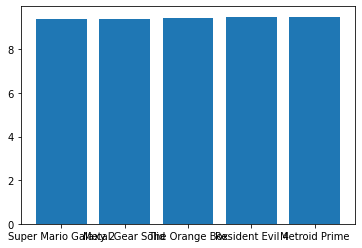

In [78]:

import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

data = [9.4, 9.4, 9.45, 9.5, 9.5]
plt.bar(['Super Mario Galaxy 2','Metal Gear Solid','The Orange Box','Resident Evil 4','Metroid Prime'], data)
plt.show()

# HINT

**How to create the Aggregate Score Column?**

\begin{equation*}
AggregateScore = \frac{(CriticCount * CriticScore)+(UserCount * UserScore)}{UserCount + CriticCount}
\end{equation*}

**Check Your Column Values**

The Critic_Score column is scored out of 100. The User_Score column is scored out of 10. You will need to modify one of the columns to match the other.

## Documentation

In the meantime, check out pandas the user guide in the [pandas documentation](https://pandas.pydata.org/docs/user_guide/index.html#user-guide).

-------
**Why should I use the documentation?**

On the job as a data scientist or data analyst, more often than not, you may find yourself looking up the documentation of a particular function or plugin you use. Don't worry if there are a few functions you don't know by heart. However, there are just too many to know! An essential skill is to learn how to navigate documentation and understand how to apply the examples to your work. 

--------

Additional resources:

- To learn more about these topics, as well as other topics not covered here (e.g. reshaping, merging, additional subsetting methods, working with text data, etc.) check out [these introductory tutorials](https://pandas.pydata.org/docs/getting_started/index.html#getting-started) from the `pandas` documentation
- To learn more about subsetting your data, check out [this tutorial](https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html#min-tut-03-subset)
- This [pandas cheatsheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf) may also be helpful as a reference.